## Organized Plant Disease Dataset by Category and Disease Type

In [1]:
import os
import shutil
from pathlib import Path
from natsort import natsorted

# Define the root directory of the current dataset
root_dir = "/kaggle/input/project/project"

# Define the new output directory
output_dir = "/kaggle/working/organized_dataset"

# Define categories and their corresponding diseases (with spaces)
categories = {
    "Fresh_leaf": ["Fresh leaf", "Eggplant fresh leaf", "Tomato Fresh leaf"],
    "Bacterial": ["Tomato Bacterial spot", "Black Rot"],
    "Viral": ["Mosaic virus", "Tomato leaf curl virus", "Eggplant begomovirus", "Tomato spotted wilt"],
    "Fungal": ["Downey mildew", "Downy mildew", "Fusarium wilt", "Anthracnose", 
               "Eggplant Cercopora leaf spot", "Eggplant verticillium wilt", "Anthracnose lesions"]
}

# If the folder already exists, remove it and create a new one
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

# Create new category folders
for category in categories:
    Path(os.path.join(output_dir, category)).mkdir(parents=True, exist_ok=True)

# Initialize a dictionary to count images per category
image_counts = {category: 0 for category in categories}
image_counters = {category: {} for category in categories}

# Function to get category for a given folder
def get_category(folder_name):
    for category, folders in categories.items():
        if folder_name in folders:
            return category
    raise ValueError(f"Folder {folder_name} not found in any category!")

# Walk through the current dataset
for crop_folder in os.listdir(root_dir):
    crop_path = os.path.join(root_dir, crop_folder)
    if not os.path.isdir(crop_path):
        continue
    
    for disease_folder in os.listdir(crop_path):
        disease_path = os.path.join(crop_path, disease_folder)
        if not os.path.isdir(disease_path):
            continue
        
        # Determine the category for the disease
        try:
            category = get_category(disease_folder)
        except ValueError as e:
            print(e)
            continue
        
        # Initialize counter if not already done
        if disease_folder not in image_counters[category]:
            image_counters[category][disease_folder] = 1
        
        # Process each image in the disease folder (Natural Sort to maintain order)
        image_files = natsorted(os.listdir(disease_path))
        
        for image_name in image_files:
            image_path = os.path.join(disease_path, image_name)
            if not os.path.isfile(image_path):
                continue
            
            # New image name format: Crop_Disease_imgX.jpg
            new_image_name = f"{crop_folder.replace(' ', '_')}_{disease_folder.replace(' ', '_')}_img{image_counters[category][disease_folder]}.jpg"
            destination_path = os.path.join(output_dir, category, new_image_name)
            
            # Copy the image to the new location with the new name
            shutil.copy2(image_path, destination_path)
            image_counters[category][disease_folder] += 1
            image_counts[category] += 1

print("\n Dataset organization complete!")



 Dataset organization complete!


In [2]:
import os
from natsort import natsorted

# Folder path for Bacterial
folder_path = "/kaggle/working/organized_dataset/Bacterial"

image_names = natsorted(os.listdir(folder_path))
print("First_5_items of Bacterial")
for image_name in image_names[:5]:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Fresh_leaf"

image_names = natsorted(os.listdir(folder_path))
print("last_5_items Fresh leaf") 
for image_name in image_names[-5:]:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Fungal"

image_names = natsorted(os.listdir(folder_path))
print("Middle_5_items of Fungal")
middle_5_items = image_names[len(image_names)//2 - 2 : len(image_names)//2 + 3]
for image_name in middle_5_items:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Viral"

image_names = natsorted(os.listdir(folder_path))
print("First_5_items of Viral")
for image_name in image_names[:5]:
    print(image_name)

First_5_items of Bacterial
Cauliflower_Black_Rot_img1.jpg
Cauliflower_Black_Rot_img2.jpg
Cauliflower_Black_Rot_img3.jpg
Cauliflower_Black_Rot_img4.jpg
Cauliflower_Black_Rot_img5.jpg
last_5_items Fresh leaf
Tomato_Tomato_Fresh_leaf_img590.jpg
Tomato_Tomato_Fresh_leaf_img591.jpg
Tomato_Tomato_Fresh_leaf_img592.jpg
Tomato_Tomato_Fresh_leaf_img593.jpg
Tomato_Tomato_Fresh_leaf_img594.jpg
Middle_5_items of Fungal
Cauliflower_Downy_mildew_img352.jpg
Cauliflower_Downy_mildew_img353.jpg
Cauliflower_Downy_mildew_img354.jpg
Cauliflower_Downy_mildew_img355.jpg
Cauliflower_Downy_mildew_img356.jpg
First_5_items of Viral
Bitter_Gourd_Mosaic_virus_img1.jpg
Bitter_Gourd_Mosaic_virus_img2.jpg
Bitter_Gourd_Mosaic_virus_img3.jpg
Bitter_Gourd_Mosaic_virus_img4.jpg
Bitter_Gourd_Mosaic_virus_img5.jpg


## Total Images and Folder-wise Distribution Overview

In [3]:
# Calculate total images
total_images = sum(image_counts.values())

# Print image counts per category
print("Image counts per category:")
for category, count in image_counts.items():
    print(f"{category}: {count} images")
print(f"\nTotal images across all categories: {total_images} images")

Image counts per category:
Fresh_leaf: 3487 images
Bacterial: 1149 images
Viral: 2729 images
Fungal: 5421 images

Total images across all categories: 12786 images


## Bar Chart Representation of Folder-wise Image Counts
Display each category with the number of images for easy comparison.


Bar chart saved as 'image_count_plot.png'


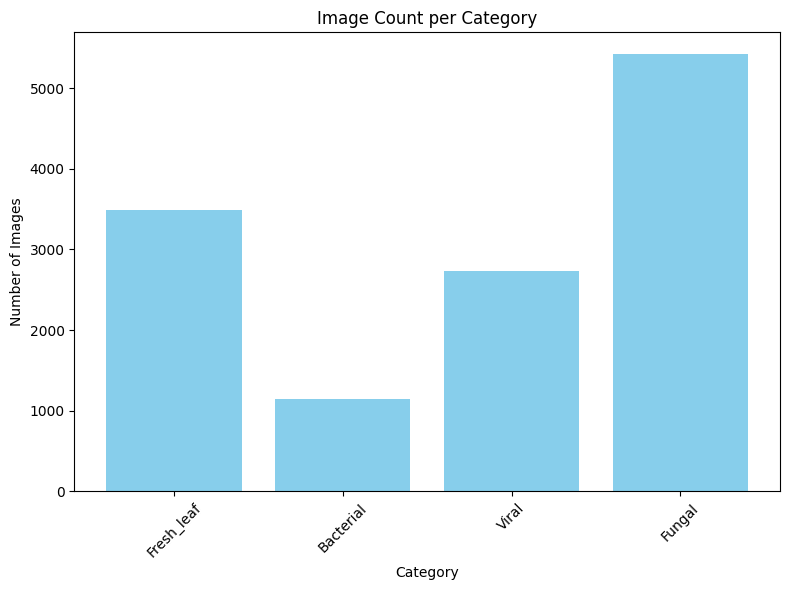

In [4]:
import matplotlib.pyplot as plt

# Create a bar chart for image counts
plt.figure(figsize=(8, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.title("Image Count per Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig("image_count_plot.png")
print("\nBar chart saved as 'image_count_plot.png'")

In [5]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git


!pip install lime

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-sxa_4vww
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-sxa_4vww
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 781dbc0d16ffa95b6d18b96b7b829840a82d93d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from lime import lime_image
import zipfile
import os
from tqdm import tqdm  # Import tqdm for progress bars

## Pre-Processing and Load the Dataset

In [7]:
# Define transformations with potential augmentations
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),      
    transforms.RandomHorizontalFlip(),     
    transforms.ToTensor(),                  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),         
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
# Load dataset
dataset = datasets.ImageFolder(root="/kaggle/working/organized_dataset", transform=transform_train)
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
# Apply test transformation to validation and test sets

val_dataset.dataset.transform = transform_test
test_dataset.dataset.transform = transform_test

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Data Visualization for Each Class

['Bacterial', 'Fresh_leaf', 'Fungal', 'Viral']
{'Bacterial': 0, 'Fresh_leaf': 1, 'Fungal': 2, 'Viral': 3}
4


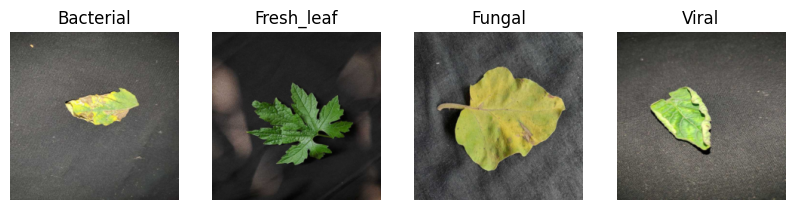

In [8]:
class_names = dataset.classes
print(class_names)
print(dataset.class_to_idx)
# Output: {'anthracnose': 0, 'downey mildew': 1, 'fresh leaf': 2}
num_classes = len(class_names)
print(num_classes)
fig, axs = plt.subplots(1, num_classes, figsize=(10, 4))
# Dictionary to track displayed images per class
displayed_classes = {class_name: False for class_name in class_names}

# Loop through the data to get at least one sample from each class
for images, labels in train_loader:
    for img, label in zip(images, labels):
        class_name = class_names[label]
        # Display the image if not already displayed for this class
        if not displayed_classes[class_name]:
            img = img.permute(1, 2, 0).numpy()
            img = (img * 0.5) + 0.5  # Unnormalize the image
            axs[label].imshow(np.clip(img, 0, 1))  # Clip to valid range
            axs[label].set_title(class_name)
            axs[label].axis('off')
            displayed_classes[class_name] = True  # Mark as displayed

        # Break if all classes are displayed
        if all(displayed_classes.values()):
            break

    if all(displayed_classes.values()):
        break
plt.show()

# Custom CNN model

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # Convolutional Layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * 14 * 14, 512)  
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 4)  # Change 3 → my number of classes
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2)

        x = torch.flatten(x, start_dim=1)  # Dynamic flattening

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.fc4(x)

        return x


## Early Stopping Logic

In [10]:
class EarlyStopping:

    def __init__(self, patience=5):

        self.patience = patience
        self.counter = 0
        self.best_loss = np.inf

    def check_early_stop(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False


## Train the Model and Plot Loss Curves

### Using AMP with Custom Model

To improve training speed, we can utilize Automatic Mixed Precision (AMP) provided by torch.cuda.amp. AMP enables faster training by using lower precision (float16) for parts of the computation while maintaining accuracy with some operations in higher precision (float32).

In [11]:
from tqdm import tqdm  # Import tqdm for progress bars
from torch.cuda.amp import autocast, GradScaler  # Import AMP utilities

# Set number of epochs and initialize variables

num_epochs = 50  # Define the number of training epochs

model = CustomCNN().to('cuda')  # Move model to GPU

criterion = nn.CrossEntropyLoss()  # Loss function

optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer with learning rate

early_stopping = EarlyStopping(patience=5)  # Initialize early stopping with patience

train_losses, val_losses = [], []  # Lists to store training and validation losses per epoch

# Initialize GradScaler for AMP
scaler = GradScaler()
# Loop over epochs
for epoch in range(num_epochs):

    print(f"Epoch {epoch+1}/{num_epochs}")
    # Training phase
    model.train()  # Set model to training mode
    train_loss = 0  # Initialize cumulative training loss for the epoch
    # Loop over training data with tqdm progress bar
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
        optimizer.zero_grad()  # Clear previous gradients
        with autocast():  # Use AMP for mixed-precision calculations
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

        # Scale loss to avoid underflow for float16
        scaler.scale(loss).backward()  # Backward pass with scaled loss
        scaler.step(optimizer)  # Optimizer step
        scaler.update()  # Update the scaler for next iteration
        train_loss += loss.item()  # Accumulate the training loss

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0  # Initialize cumulative validation loss for the epoch
    with torch.no_grad():  # Disable gradient calculation for validation
        # Loop over validation data with tqdm progress bar
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
            with autocast():  # Use AMP for mixed-precision calculations
                outputs = model(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
            val_loss += loss.item()  # Accumulate the validation loss

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    progress = ((epoch + 1) / num_epochs) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f} - Progress: {progress:.2f}%")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

/tmp/ipykernel_31/789814707.py:19: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/50


Training:   0%|          | 0/280 [00:00<?, ?it/s]/tmp/ipykernel_31/789814707.py:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use AMP for mixed-precision calculations
Validation:   0%|          | 0/80 [00:00<?, ?it/s]         /tmp/ipykernel_31/789814707.py:48: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use AMP for mixed-precision calculations


Epoch [1/50] - Train Loss: 1.1053, Val Loss: 0.7255 - Progress: 2.00%
Epoch 2/50


Epoch [2/50] - Train Loss: 0.6111, Val Loss: 0.3960 - Progress: 4.00%
Epoch 3/50


Epoch [3/50] - Train Loss: 0.3589, Val Loss: 0.2389 - Progress: 6.00%
Epoch 4/50


Epoch [4/50] - Train Loss: 0.2520, Val Loss: 0.2347 - Progress: 8.00%
Epoch 5/50


Epoch [5/50] - Train Loss: 0.1688, Val Loss: 0.0995 - Progress: 10.00%
Epoch 6/50


Epoch [6/50] - Train Loss: 0.1497, Val Loss: 0.0901 - Progress: 12.00%
Epoch 7/50


Epoch [7/50] - Train Loss: 0.1015, Val Loss: 0.0771 - Progress: 14.00%
Epoch 8/50


Epoch [8/50] - Train Loss: 0.0867, Val Loss: 0.1131 - Progress: 16.00%
Epoch 9/50


Epoch [9/50] - Train Loss: 0.1042, Val Loss: 0.0768 - Progress: 18.00%
Epoch 10/50


Epoch [10/50] - Train Loss: 0.0642, Val Loss: 0.0654 - Progress: 20.00%
Epoch 11/50


Epoch [11/50] - Train Loss: 0.0542, Val Loss: 0.0725 - Progress: 22.00%
Epoch 12/50


Epoch [12/50] - Train Loss: 0.0726, Val Loss: 0.0891 - Progress: 24.00%
Epoch 13/50


Epoch [13/50] - Train Loss: 0.1031, Val Loss: 0.1201 - Progress: 26.00%
Epoch 14/50


Epoch [14/50] - Train Loss: 0.0630, Val Loss: 0.0812 - Progress: 28.00%
Epoch 15/50


Epoch [15/50] - Train Loss: 0.0442, Val Loss: 0.0795 - Progress: 30.00%
Early stopping triggered.


## Loss Curve for Custom CNN

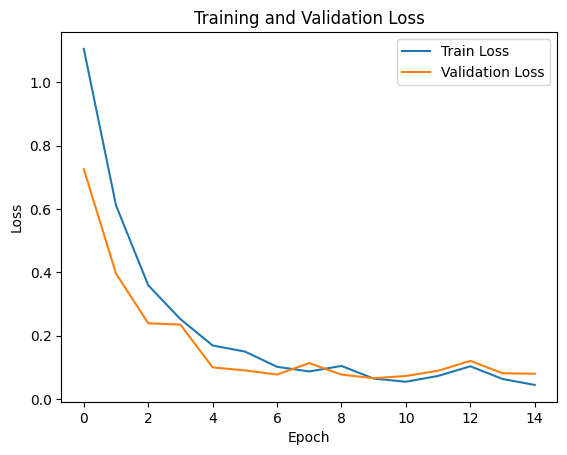

In [12]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [13]:
# Define a path for saving the model
model_save_path = "custom_cnn_model.pth"  # You can specify a different path or filename

# Save the model after training completes or early stopping is triggered
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to custom_cnn_model.pth


## Model Evaluation and Metrics Calculation for Custom CNN

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model to evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model(images)

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 97.50%
Precision: 0.9754
Recall: 0.9750
F1 Score: 0.9750


#  Transfer Learning Model

In [15]:
import torch.nn as nn
import timm

def get_transfer_model(model_name, num_classes):
    if model_name == 'resnext101_32x8d':
        model = timm.create_model('resnext101_32x8d', pretrained=True)
        model.fc = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'densenet201':
        model = timm.create_model('densenet201', pretrained=True)
        model.classifier = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'efficientnetv2_m':
        model = timm.create_model('efficientnetv2_m', pretrained=True)
        model.classifier = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'nasnetalarge':
        model = timm.create_model('nasnetalarge', pretrained=True)
        model.last_linear = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'convnext_base':
        model = timm.create_model('convnext_base', pretrained=True)
        model.head = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'seresnext101_32x8d':
        model = timm.create_model('seresnext101_32x8d', pretrained=True)
        model.fc = nn.Linear(model.get_classifier().in_features, num_classes)

    else:
        raise ValueError(f"Model '{model_name}' not supported. Please check the name.")

    return model


## Transfer Learning Example using ResNeXt101

In [16]:
from tqdm import tqdm  # Import tqdm for progress bars
from torch.cuda.amp import autocast, GradScaler  # Import AMP utilities

# Set number of epochs and initialize variables
num_epochs = 50  # Define the number of training epochs

# Use your custom CNN model (model_1) here
model_1 = get_transfer_model('resnext101_32x8d', num_classes).to('cuda')  # Using 'model_1' for custom CNN

criterion = nn.CrossEntropyLoss()  # Loss function

optimizer = optim.Adam(model_1.parameters(), lr=0.001)  # Optimizer with learning rate

early_stopping = EarlyStopping(patience=5)  # Initialize early stopping with patience

train_losses, val_losses = [], []  # Lists to store training and validation losses per epoch

# Initialize GradScaler for AMP
scaler = GradScaler()

# Loop over epochs
for epoch in range(num_epochs):

    print(f"Epoch {epoch+1}/{num_epochs}")
    # Training phase
    model_1.train()  # Set model to training mode
    train_loss = 0  # Initialize cumulative training loss for the epoch
    # Loop over training data with tqdm progress bar
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU

        optimizer.zero_grad()  # Clear previous gradients

        with autocast():  # Use AMP for mixed-precision calculations
            outputs = model_1(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

        # Scale loss to avoid underflow for float16
        scaler.scale(loss).backward()  # Backward pass with scaled loss
        scaler.step(optimizer)  # Optimizer step
        scaler.update()  # Update the scaler for next iteration
        train_loss += loss.item()  # Accumulate the training loss

    # Validation phase
    model_1.eval()  # Set model to evaluation mode
    val_loss = 0  # Initialize cumulative validation loss for the epoch
    with torch.no_grad():  # Disable gradient calculation for validation
        # Loop over validation data with tqdm progress bar
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
            with autocast():  # Use AMP for mixed-precision calculations
                outputs = model_1(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
            val_loss += loss.item()  # Accumulate the validation loss

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

# Save the model
torch.save(model_1.state_dict(), 'custom_cnn_model_1.pth')  # Save the custom CNN model as 'custom_cnn_model_1.pth'
print("Model saved as 'custom_cnn_model_1.pth'")


model.safetensors:   0%|          | 0.00/356M [00:00<?, ?B/s]

/tmp/ipykernel_31/3130161404.py:19: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/50


Training:   0%|          | 0/280 [00:00<?, ?it/s]/tmp/ipykernel_31/3130161404.py:34: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use AMP for mixed-precision calculations
Validation:   0%|          | 0/80 [00:00<?, ?it/s]         /tmp/ipykernel_31/3130161404.py:51: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use AMP for mixed-precision calculations


Epoch [1/50] - Train Loss: 0.3007, Val Loss: 0.2155
Epoch 2/50


Epoch [2/50] - Train Loss: 0.1222, Val Loss: 0.2467
Epoch 3/50


Epoch [3/50] - Train Loss: 0.0997, Val Loss: 0.0598
Epoch 4/50


Epoch [4/50] - Train Loss: 0.0770, Val Loss: 0.0427
Epoch 5/50


Epoch [5/50] - Train Loss: 0.0746, Val Loss: 0.0899
Epoch 6/50


Epoch [6/50] - Train Loss: 0.0637, Val Loss: 0.1098
Epoch 7/50


Epoch [7/50] - Train Loss: 0.0452, Val Loss: 0.0677
Epoch 8/50


Epoch [8/50] - Train Loss: 0.0473, Val Loss: 0.0712
Epoch 9/50


Epoch [9/50] - Train Loss: 0.0482, Val Loss: 0.0339
Epoch 10/50


Epoch [10/50] - Train Loss: 0.0539, Val Loss: 0.1377
Epoch 11/50


Epoch [11/50] - Train Loss: 0.0369, Val Loss: 0.1467
Epoch 12/50


Epoch [12/50] - Train Loss: 0.0352, Val Loss: 0.0262
Epoch 13/50


Epoch [13/50] - Train Loss: 0.0423, Val Loss: 0.0487
Epoch 14/50


Epoch [14/50] - Train Loss: 0.0404, Val Loss: 0.0549
Epoch 15/50


Epoch [15/50] - Train Loss: 0.0457, Val Loss: 0.0312
Epoch 16/50


Epoch [16/50] - Train Loss: 0.0476, Val Loss: 0.0492
Epoch 17/50


Epoch [17/50] - Train Loss: 0.0228, Val Loss: 0.0415
Early stopping triggered.
Model saved as 'custom_cnn_model_1.pth'


## Loss Curve for ResNeXt101

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


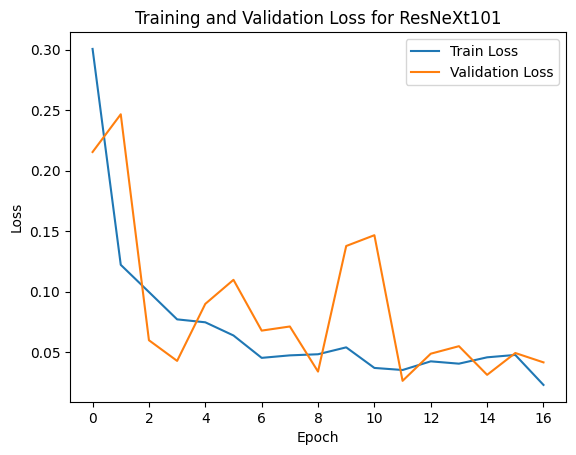

In [17]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for ResNeXt101")
plt.show()

## Model Evaluation and Metrics Calculation for ResNeXt101

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model_1 to evaluation mode
model_1.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model_1(images)  # Using model_1 for prediction

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 98.67%
Precision: 0.9867
Recall: 0.9867
F1 Score: 0.9867


## Transfer Learning Example using densenet201

In [ ]:
# Set number of epochs and initialize variables
num_epochs = 50  # Define the number of training epochs

# Initialize the DenseNet201 transfer learning model
model_2 = get_transfer_model('densenet201', num_classes).to('cuda')  # Using 'model_2' for DenseNet201

criterion = nn.CrossEntropyLoss()  # Loss function

optimizer = optim.Adam(model_2.parameters(), lr=0.001)  # Optimizer with learning rate

early_stopping = EarlyStopping(patience=5)  # Initialize early stopping with patience

train_losses, val_losses = [], []  # Lists to store training and validation losses per epoch

# Initialize GradScaler for AMP
scaler = GradScaler()

# Loop over epochs
for epoch in range(num_epochs):

    print(f"Epoch {epoch+1}/{num_epochs}")
    # Training phase
    model_2.train()  # Set model to training mode
    train_loss = 0  # Initialize cumulative training loss for the epoch
    
    # Loop over training data with tqdm progress bar
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU

        optimizer.zero_grad()  # Clear previous gradients

        with autocast():  # Use AMP for mixed-precision calculations
            outputs = model_2(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

        # Scale loss to avoid underflow for float16
        scaler.scale(loss).backward()  # Backward pass with scaled loss
        scaler.step(optimizer)  # Optimizer step
        scaler.update()  # Update the scaler for next iteration
        train_loss += loss.item()  # Accumulate the training loss

    # Validation phase
    model_2.eval()  # Set model to evaluation mode
    val_loss = 0  # Initialize cumulative validation loss for the epoch
    with torch.no_grad():  # Disable gradient calculation for validation
        # Loop over validation data with tqdm progress bar
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
            with autocast():  # Use AMP for mixed-precision calculations
                outputs = model_2(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
            val_loss += loss.item()  # Accumulate the validation loss

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

# Save the model
torch.save(model_2.state_dict(), 'densenet201_model_2.pth')  # Save the DenseNet201 model as 'densenet201_model_2.pth'
print("Model saved as 'densenet201_model_2.pth'")


model.safetensors:   0%|          | 0.00/81.1M [00:00<?, ?B/s]

/tmp/ipykernel_31/3783741071.py:16: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/50


Training:   0%|          | 0/280 [00:00<?, ?it/s]/tmp/ipykernel_31/3783741071.py:32: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use AMP for mixed-precision calculations
Validation:   0%|          | 0/80 [00:00<?, ?it/s]         /tmp/ipykernel_31/3783741071.py:49: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use AMP for mixed-precision calculations


Epoch [1/50] - Train Loss: 0.1973, Val Loss: 0.1888
Epoch 2/50


Epoch [2/50] - Train Loss: 0.0741, Val Loss: 0.3566
Epoch 3/50


Training:   5%|▍         | 13/280 [00:05<01:59,  2.24it/s]

## Loss Curve for densenet201

In [ ]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for densenet201")
plt.show()

##  Model Evaluation and Metrics Calculation for densenet201

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model_2 to evaluation mode
model_2.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model_2(images)  # Using model_2 for prediction

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")